In [1]:
from qiskit import *

In [2]:
circuit = QuantumCircuit(3, 3)

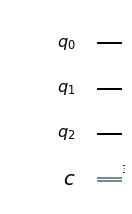

In [3]:
%matplotlib inline
circuit.draw(output="mpl")

## Teleportation between qubit 0 and qubit 2 

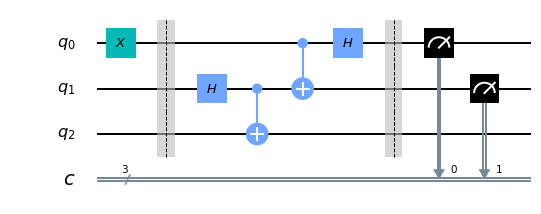

In [4]:
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

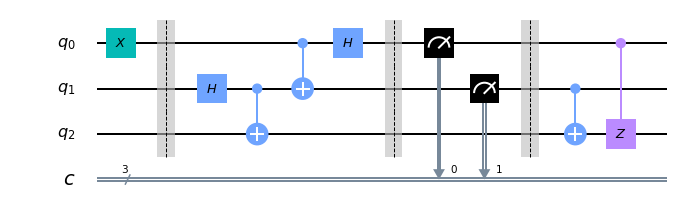

In [5]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

## Simulating the circuit on the local computer

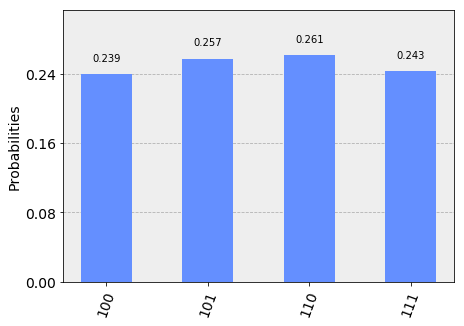

In [6]:
circuit.measure(2,2)

simulator = Aer.get_backend('qasm_simulator')
# qasm: Quantum Assembly Language
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [7]:
print(counts)

{'101': 263, '110': 267, '100': 245, '111': 249}


## Simulating on IBM Q Experience quantum device

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

In [10]:
job = execute(circuit, backend= qcomp)

In [11]:
from qiskit.tools.monitor import job_monitor

In [12]:
job_monitor(job)

Job Status: job has successfully run


In [13]:
result = job.result()

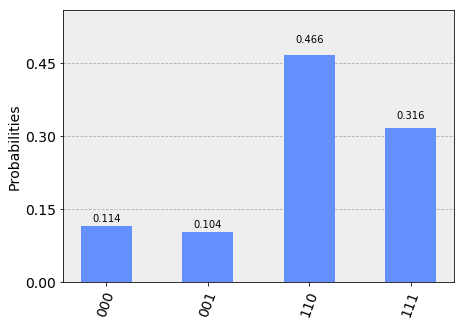

In [14]:
plot_histogram(result.get_counts(circuit))

In [19]:
# increase num of shots
job2 = execute(circuit, backend=qcomp, shots=3072)
job_monitor(job2)

Job Status: job has successfully run


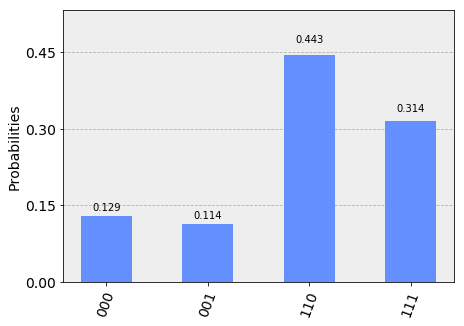

In [20]:
result2 = job2.result()
plot_histogram(result2.get_counts(circuit))